# Retail Sales Analysis
This project explores retail sales data to identify revenue trends, customer demographics, and key business insights using Python.

## Data Cleaning 
This section focuses on inspecting, validating and preparing the retail sales dataset for analysis.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("retail_sales_dataset.csv")

In [3]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [8]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
Year                0
Month               0
Month_Name          0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

### Date Formatting and Feature Engineering
The date column was converted to a datetime format to enable time-based analysis. Additional time-based features were created to support trend and seasonal analysis.

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Month_Name'] = df['Date'].dt.month_name()

df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Year,Month,Month_Name
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,11,November
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2,February
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,1,January
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,5,May
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,5,May


In [13]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)
df.head()

,transaction_id,date,customer_id,gender,age,product_category,quantity,price_per_unit,total_amount,year,month,month_name
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,2023,11,November
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,2023,2,February
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,2023,1,January
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,2023,5,May
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,2023,5,May


In [14]:
df['quantity'] = pd.to_numeric(df['quantity'])
df['price_per_unit'] - pd.to_numeric(df['price_per_unit'])
df['total_amount'] = pd.to_numeric(df['total_amount'])

### Data Cleaning Summary 
- Loaded and Inspected the retail sales dataset
- Checked for missing values and duplicate records
- Converted the date column to datetime format
- Created time based features (year, month, month name)
- Standardised column names for consistency
- Prepared the dataset for analysis and visualisation

## Exploratory Data Analysis 
The goal of this section is to explore sales performance, customer behaviour, and product trends to uncover actionable business insights.

In [19]:
df.shape

(1000, 12)

In [20]:
df.describe()

,transaction_id,date,age,quantity,price_per_unit,total_amount,year,month
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000,2023.002000,6.549000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000,2023.000000,1.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000,2023.000000,4.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000,2023.000000,6.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000,2023.000000,10.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000,2024.000000,12.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632,0.044699,3.452755


In [25]:
total_revenue = df['total_amount'].sum()
total_transactions = df['transaction_id'].nunique()
average_order_value = df['total_amount'].mean()

total_revenue, total_transactions, average_order_value

(np.int64(456000), 1000, np.float64(456.0))

- Total Revenue represents overall sales performance.
- Average Order Value (AOV) indicates typical customer spend per transaction.

In [27]:
sales_by_category = (
    df.groupby('product_category')['total_amount']
    .sum()
    .sort_values(ascending = False)
)

sales_by_category

product_category
Electronics    156905
Clothing       155580
Beauty         143515
Name: total_amount, dtype: int64

Product categories were analysed to identify the top revenue drivers.

In [28]:
monthly_sales = (
    df.groupby(['year', 'month'])['total_amount']
    .sum()
    .reset_index()
)
monthly_sales.head()

,year,month,total_amount
0,2023,1,35450
1,2023,2,44060
2,2023,3,28990
3,2023,4,33870
4,2023,5,53150


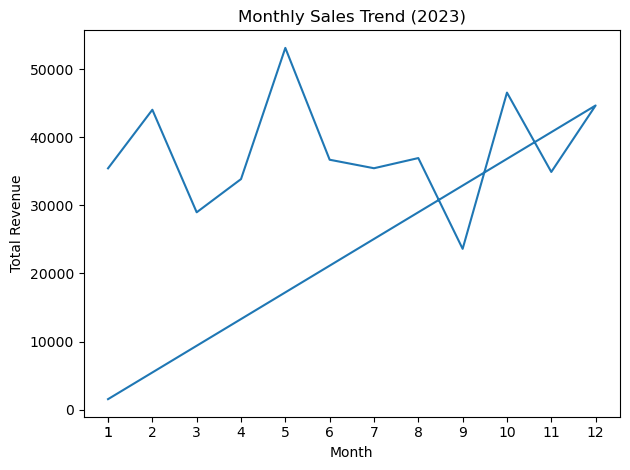

In [32]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(monthly_sales['month'], monthly_sales['total_amount'])
plt.title("Monthly Sales Trend (2023)")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.xticks(monthly_sales['month'])
plt.tight_layout()
plt.show()

#### Monthly Sales Insights
Sales peaked in May 2023, suggesting possible seasonability or promotional activity during this period.

In [29]:
gender_sales =(
    df.groupby('gender')['total_amount']
    .sum()
    .sort_values(ascending = False)
)
gender_sales

gender
Female    232840
Male      223160
Name: total_amount, dtype: int64

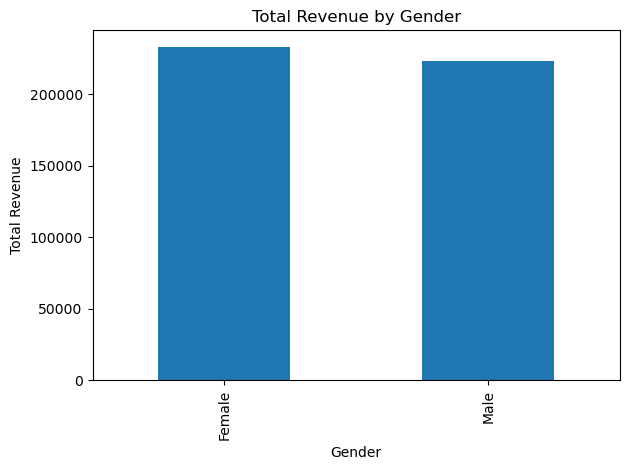

In [33]:
plt.figure()
gender_sales.plot(kind='bar')
plt.title("Total Revenue by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Revenue")
plt.tight_layout()
plt.show()

### Gender-based Sales Insights 

Female customers generated slightly higher total revenue than male costumers, indicating a small difference in purchasing behaviour.

In [39]:
age_distribution = df['age'].describe()
age_distribution

count    1000.00000
mean       41.39200
std        13.68143
min        18.00000
25%        29.00000
50%        42.00000
75%        53.00000
max        64.00000
Name: age, dtype: float64

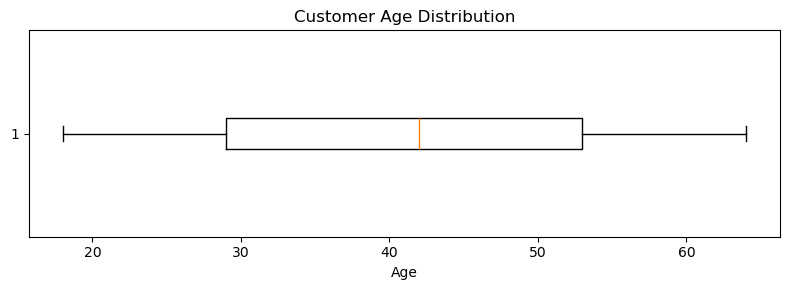

In [44]:
plt.figure(figsize=(8, 3))
plt.boxplot(df['age'], vert=False)
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.tight_layout()
plt.show()


### Customer Age Insight

Most customers fall between the ages of approximately 30 and 55, suggesting the retailer primarily serves a middle-aged customer base.


## Key Business Insights

- Electronics was the highest revenue-generating product category, indicating strong customer demand.
- Sales peaked in May 2023, suggesting possible seasonality or promotional influence.
- Female customers generated slightly higher total revenue than male customers.
- The average customer age indicates a core customer base of middle-aged shoppers.
- The dataset contains very limited data for 2024, so trend analysis focuses primarily on 2023.



In [45]:
df.to_csv("clean_retail_sales.csv", index = False)

In [46]:
monthly_sales = (
    df.groupby(df['date'].dt.to_period('M'))['total_amount']
    .sum()
    .reset_index()
)

monthly_sales['date'] = monthly_sales['date'].astype(str)
monthly_sales.to_csv("mohtly_sales.csv", index = False)

In [48]:
category_sales = (
    df.groupby('product_category')['total_amount']
    .sum()
    .reset_index()
)

category_sales.to_csv("category_sales.csv", index = False)

In [49]:
gender_sales =(
    df.groupby('gender')['total_amount']
    .sum()
    .reset_index()
)

gender_sales.to_csv("gender_sales.csv", index=False)

## SQL Analysis (SQLite)
SQL queries were written and executed in DB Browser for SQLite to calculate key business metrics including total revenue, monthly trends, and revenue by product category.
These queries are saved in the project file 'sql_queries.sql'.